In [1]:
import pandas as pd
import skimage as ski
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np

%matplotlib widget

In [2]:
print(ski.__version__)

0.22.0


In [3]:
image1= iio.imread(uri='/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/DATASETS/train/10_left.jpeg')

Using `ii0.imread()` to read a JPEG image, imageio reads the image and converts it from jpeg to NumPy array and returns the array. 


codes from: https://datacarpentry.org/image-processing/03-skimage-images.html 

In [4]:
image1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [5]:
if len(image1.shape) == 3 and image1.shape[2]==3:
    print('the image is in RGB format')
else: 
    print('not in rgb')

the image is in RGB format


In [6]:
print(f'the shape of the image is {image1.shape}')

the shape of the image is (3168, 4752, 3)


In [7]:
print(image1.dtype)

uint8


#### About image types and shapes 

in skimage, images are simply numpy arrays, which support a variety of data types. 
To allow easier modification of images, the input will be converted to the required type (if possible). 
`img_as_float` : convert to floating point (integer types become 64-bit floats) 
`img_as_ubyte`: convert to a 8-bit uint 
`img_as_uint` : convert to 16-bit uint
`img_as_int` : conver to 16-bit int

Converstions can result in loss of precision, since 8 bits cannot hold the same amount of info as 64 bits. 

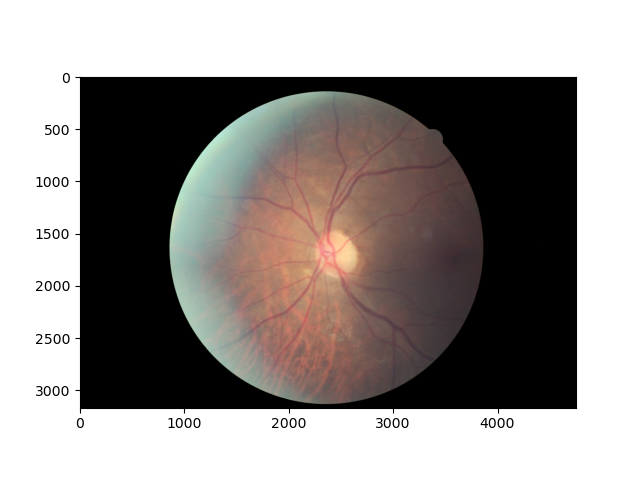

In [8]:
fig, ax = plt.subplots()
plt.imshow(image1)

In [9]:
image2 = (image1.shape[0] // 10, image1.shape[1] // 10, image1.shape[2])
resized_image = ski.transform.resize(image=image1, output_shape=image2)
resized_image = ski.util.img_as_ubyte(resized_image)

In [53]:
print(resized_image.dtype)

uint8


In [54]:
print(image_gray.dtype)

float64


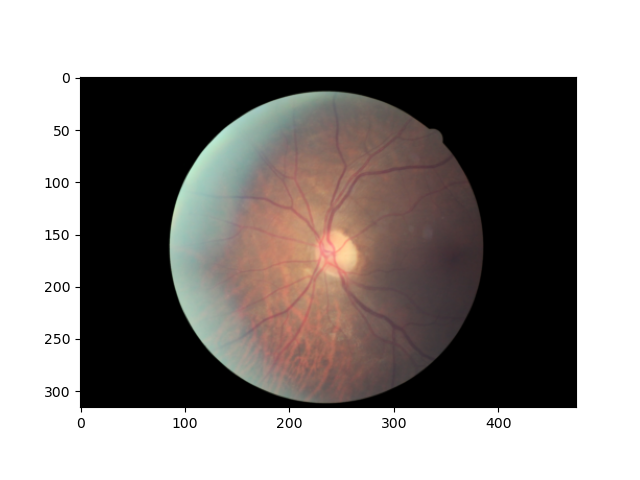

In [10]:
fig, ax = plt.subplots()
plt.imshow(resized_image)

Note that the pixel values in the new image are an approx of the original values and should not be confused with actual, observed data. This is because scikit-image interpolates the pixel values when reducing or increasing the size of an image.

Images files on disk are normally stored as whole numbers for space efficiency, but transformations and other math operations often result in conversion to floating point numbers. Using `ski.util.img_as_ubyte()` method converts it back to while numbers before we save it back to disk. If we dont convert it before saving, `iio,imwrite()` may not recognise it as image data, this is when you want to save the image back on the computer. 

using `fig, ax = plt.subplots()` does not overwrite the first image with the second. Images appear the same size in jupyter, but you can see the size difference by comparing the scales for each.

The color images in skimage and OpenCV have 3 dimensions; width, height, and color. RGB and BGR use the same color space, except the order of colors is reversed. 

For an image with colors along the last axis, the following instruction effectively reverses the order of the colors, leaving the rows and columns unaffected: 
`image = image[:,:,::-1]`




#### Bit Images 

1-bit image: Pixel values 0 or 1 
8-bit image: pixel values 0 to 255 
10-bit image: pixel values 0 to 1023
16-bit image: pixel values 0 to 65535 
24-bit image(True Color): pixel values combination of 8 bits each for Red, Green, and Blue channels, range 0 to 255 for each channel, resulting in over 16 million possible colors 
32-bit image: pixel value usually 8 bits for each Red, Green, and Blue channels and an additional 8 bits for an alpha channel (transparency), range 0 to 255 for RGB, 0 to 255 for alpha channel 
48-bit image(16 bits per channel): pixel value: 0 to 65535 for each channel Red, Green, and Blue, range 0 to 65535 for each channel. 

Higher bit depths allow for a wider range of possible values, and therefore, more detailes and nuanced representations of color and intensities. however, higher bit depths also require more storage space. 


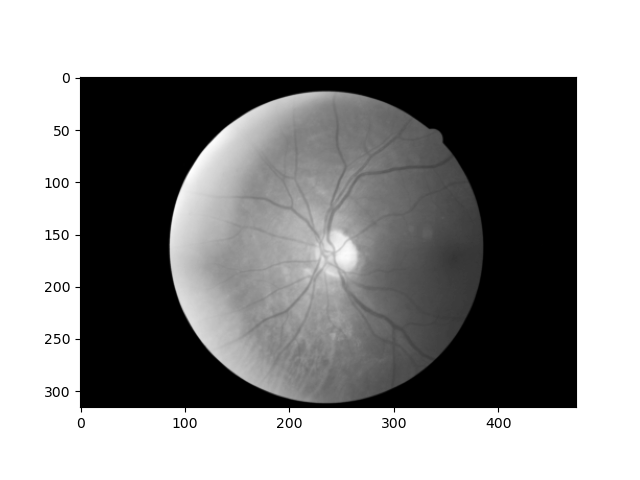

In [11]:
image_gray = rgb2gray(resized_image)
fig, ax = plt.subplots()
plt.imshow(image_gray, cmap = plt.cm.gray)

It can be easier to worth with grayscale images, which have a single channel, instead of color images which have 3. scikit-image offers the function `ski.color.rgb2gray()` to achieve this. This function adds up the three color channels in a way that matches human color perception. It returns a grayscale image with floating point values in the range from 0-1. We use the function ski.util.img_as_ubyte() in order to convert it back to the original data type and the data range back to 0-255. 

Note: it is often better to use image values represented by floating point values, because using floating point numbers is numerically more stable. 

You can also load color images as grayscale: 

`gray_image = iio.imread(uri='data/image.jpg', mode='L')`

`mode='L'` determines the type and range of pixel values in the image( e.g. an 8-bit pixel has a range of 0-255). 

the shape of this image is (3168, 4752, 3)


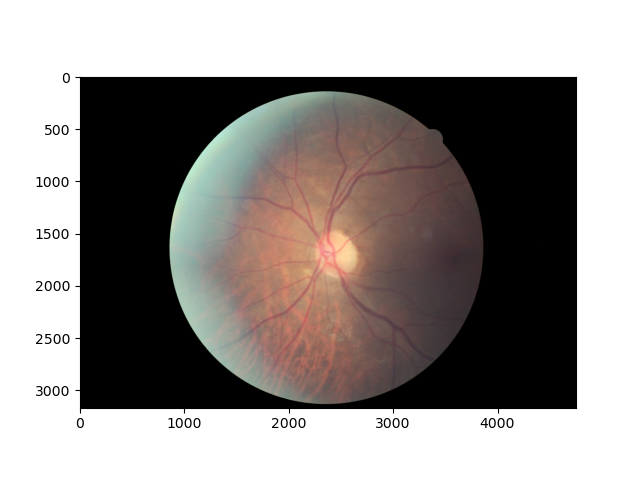

In [12]:
# converting to 64 bit 
resized_image_64 = ski.util.img_as_float(image1)
fig, ax = plt.subplots()
plt.imshow(resized_image_64)
print(f'the shape of this image is {resized_image_64.shape}')

#### Rescaling intensity values 

When possible, functions should avoid blindly stretching image intensities (e.g. rescaling a float image so that the min and max intensities are 0 and 1), since this can heavily distort an image. For example, if you're looking for bright markers in dark images, there may be an image where no markers are present; stretching its input intensity to span the full range would make background noise look like markers. 

Sometimes, however, you have images what should span the entire intensity range but do not. For example, some cameras store images with 10-, 12-, or 14- but depth per pixel. If these images are sotres in an array with dtype uint16, then the images wont extend over the full intensity range, and this would appear dimmer than it should. To correct for this, you can use the rescale_intensity() function to rescale the image so that it uses the full dtype range/ 

`image = ski.exposure.rescale_intensity(img10bit, in_range='uint10')`

the in_range argument is set to the max range for a 10-bit image, by default, `rescale_intensity()` stretches the values of `in_range` to match the range of the dtype. It also accepts strings as inputs `in_range` and `out_range`, so the example above can be written as: 

`image = ski.exposure.rescale_intensity(im10bit, in_range = 'uint10'` 

When loading an image with imageio, certain situations the timage is stored in a read-only array, and it will give a value-error: assignment destination is read-only. To make the image writeable, create a copy of the image image = np.array(image) before manipulating. 


In [13]:
image_copy = np.array(image1)

In [14]:
image_copy[image_copy < 50]=0 
#the NumPy command to ignore all low-intensity pixels is roots[roots<128]=0. Every pixel color value in the whole 3D array with a value less than 128 is set to zero. 

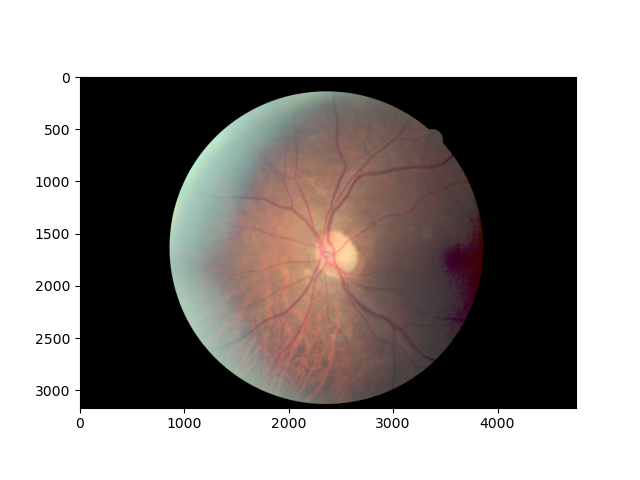

In [15]:
fig, ax = plt.subplots()
plt.imshow(image_copy)

#### Masking images 

NumPy allows indexing of images/arrays with 'boolean' arrays of the same size. Indexing with a boolean array is also called mask indexing. The 'pixels' in such a mask array can only take two values: True or False. When indexing an image with such a mask, only pixel values at positions where the mask is True are accessed. But first, we need to generate a mask array of the same size as the image. Luckily, the NumPy library provides a function to create just such an array.

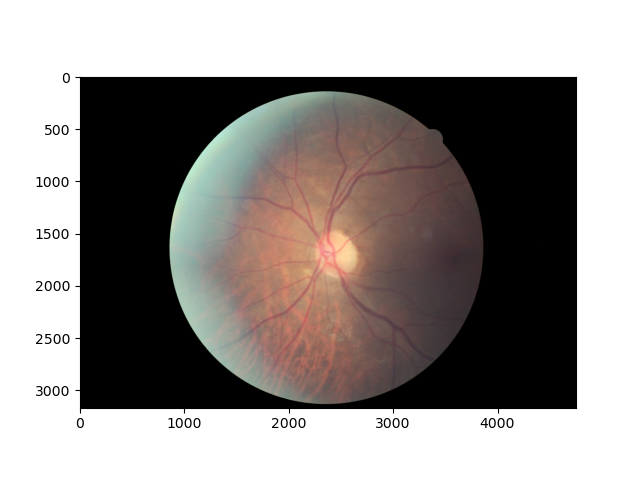

In [16]:
image_mask = np.array(image1)
fig, ax = plt.subplots()
plt.imshow(image_mask)


In [17]:
mask = np.ones(shape=image_mask.shape[0:2], dtype='bool')

`ones()` function is the shape of the original image, so that our mask will be exactly the same size as the original. We have only used the first two indices of our shape, we omitted the channel dimension. Indexing with the channel dimension will change all channel values simultaneously. `dtype=bool` inducates that the elements in the array should be booleans, values are either True or False. Even though we uses `np.ones()` to create the mask, its pixels values are in fact not 1 but True.

In [18]:
print(mask[0,0])

True


In [19]:
cx = 2500
ry = 1800

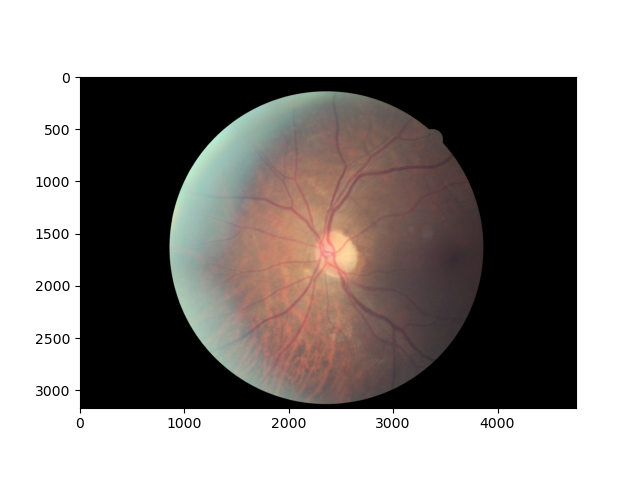

In [20]:
#draw filled rectangle on the mask image 
rr, cc = ski.draw.disk(center=(ry, cx), radius=1800, shape = image_mask.shape[0:2])
mask[rr,cc] = False
image_mask[mask] = 0

fig, ax = plt.subplots()
plt.imshow(image_mask)

### Histograms 

Histograms; a graphical representation showing how frequently various color values occur in the image. Histograms will prove to be very useful when detecting color changes between images. It can become handy when performing thresholding. 

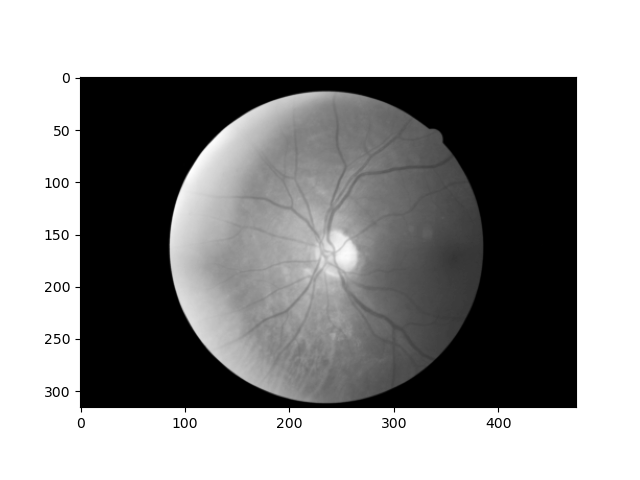

In [21]:
image_grayscale = ski.util.img_as_float(image_gray) #convert the grayscale image of integer dtype, with 0-255 range, into a floating point with 0-1 range
fig, ax = plt.subplots()
plt.imshow(image_gray, cmap ='gray') 

In [22]:
print(image_gray.dtype)

float64


In [23]:
histogram, bin_edges = np.histogram(image_gray, bins = 256, range=(0,1))

The parameter `bins` determines the number of 'bins' to use for the histogram. We pass `256` because we want to see the pixel count for each of the 256 possible values in the grayscale image. 
The parameter `range` is the range of values each of the pixels in the image can have, here we pass 0 or 1 which is the value range of our input image after conversion to floating-point. 
The first output of the `np.histogram` funnction is a 1D NumPy array, with 256 rows and 1 column, representing the number of pixels with the intensity value corresponding to the index. ie. the 1st number in the array is the number of pixels found with intensity value 1, and the final number in the array is the number of pixels found with intensity value 255. The second output of `np.histogram` is an array with the bin edges and 1 column and 257 rows(one more than the histogram itself). 

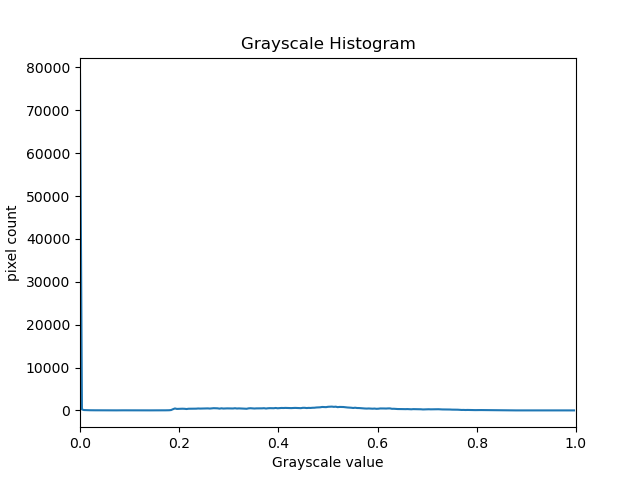

In [24]:
#configure and draw the histogram figure 
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Grayscale value')
plt.ylabel('pixel count')
plt.xlim([0.0, 1.0]) #named argument do not work here 

plt.plot(bin_edges[0:-1], histogram)

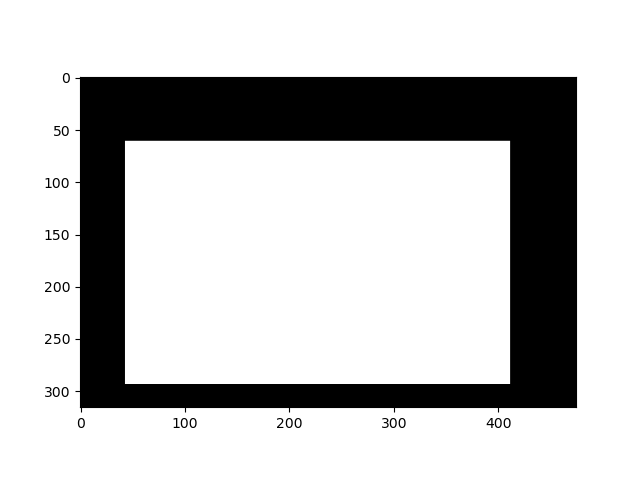

In [25]:
mask = np.zeros(shape = image_gray.shape, dtype = 'bool')
rr,cc = ski.draw.rectangle(start=(61, 43), end=(293,411))
mask[rr,cc]=True 
fig, ax = plt.subplots()
plt.imshow(mask, cmap='gray')

In [26]:
histogram, bin_edges = np.histogram(image_gray[mask], bins=256, range=(0.0, 1.0))

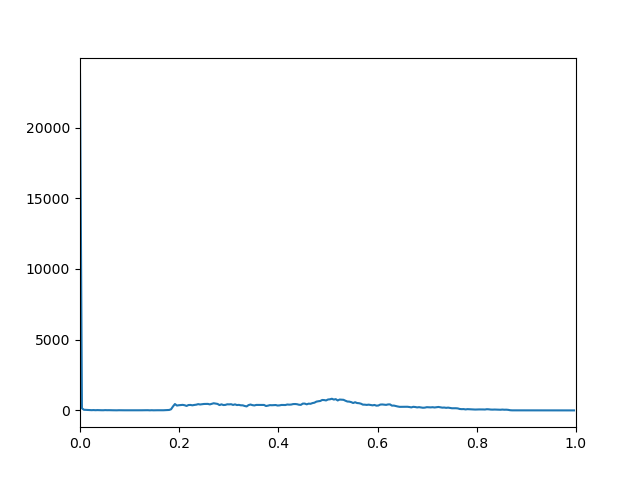

In [27]:
plt.figure()
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)

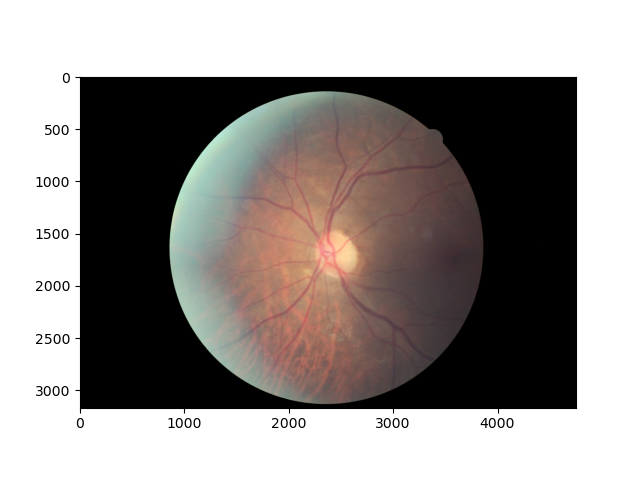

In [28]:
fig, ax = plt.subplots()
plt.imshow(image1)

Text(0, 0.5, 'pixel count')

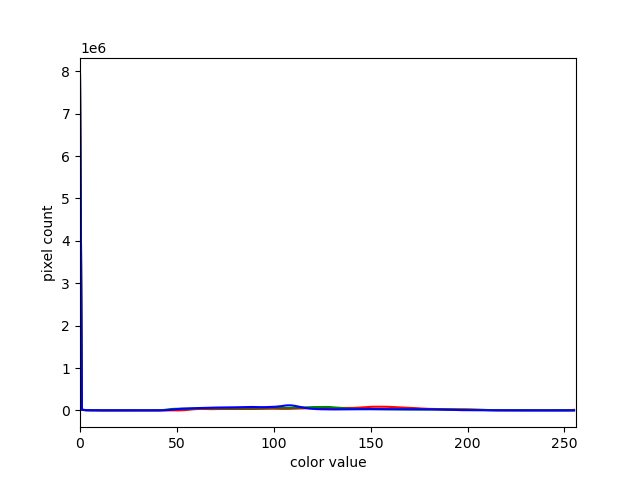

In [29]:
colors = ('red', 'green', 'blue')
plt.figure()
plt.xlim([0,256])
for channel_id, color in enumerate(colors): 
    histogram, bin_edges = np.histogram(
    image1[:,:,channel_id], bins= 256, range = (0,256))
    plt.plot(bin_edges[0:-1], histogram, color=color)
plt.xlabel('color value')
plt.ylabel('pixel count')

We draw the histogram line for each channel in a different color, and so we create a tuple of the colors to use for the three lines. Then we limit the range of the x-axis with the `plt.xlim()` function call. Next we use the `for` control structure to iterate throught the three channels, plotting an appropriately-colored histogram line for each.  



### Blurring images 

An important concept associated with the identification of objects in an image is that of edges: the lines that represent a transition from one group of similar pixels in the image to another different group. One example of an edge is the pixels that represent the boundaires of an object in an image, where the backgroud of the image ends and the object begins. 

When we blur an image, we make the color transition from one side of an edge in the image to another smooth rather than sudden. The effect is to average out rapid changes in pixel intensity. Blurring is a very common operation we need to perform before other tasks such as thresholding. There are several different blurring functions in the ski.filters module, so we will focus on just one here, the Gaussian blur. 

To blur is to make something less clear or distinct. This could be interpreted quite broadly in the context of image analysis - anything that reduces or distorts the detail of an image might apply. Applying a low-pass filter, which removes detail occuring at high spatial frequencies, is perceived as a blurring effect. A Gaussian blur is a filter that makes use of a Gaussian kernel. 

A kernel can be used to implement a filter on an image. A kernel, in this contect, is a small matrix which is combined with the image using a mathematical technique: convolution. Different sized, shapes and contents of kernel produce different effects. The kernel can be thought of as a little image itself, and will favour features of similar size and shape in the main image. On convolution with an image, a big blobby kernel will retain big blobbly low spatial frequency features. 

When we apply a filter, we consider rectangular groups of pixels surrounding each pixel in the image, in turn. The kernel is another group of pixels (a separate matrix/ small image) of the same dimensions as the rectangular group of pixels in the image, that moves along with pixels being worked on by the filter. The width and height of the kernel must be an odd number, so that the pixel being worked on is always in its centre. 

To apply the kernel to the current pixel, an average of the color values of the pixels surrounding it is calculated, weighted by the values in the kernel. In a Gaussian blur, the pixels nearest the centre of the kernel are given more weight than those far away from the center. The rate at which this weight diminishes is determined by a Gaussian function, hence the name Gaussian blur. 

A gaussian function maps random variables into a normal distribution or 'bell curve' 

more info: https://datacarpentry.org/image-processing/06-blurring.html 

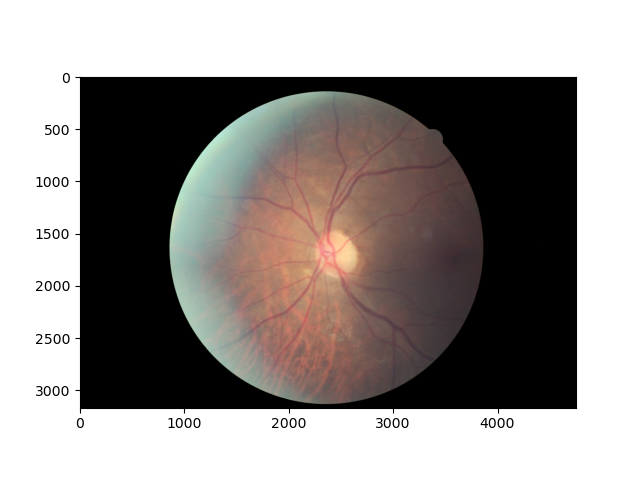

In [30]:
fig, ax = plt.subplots()
plt.imshow(image1)

In [58]:
sigma = 25.0 
blurred = ski.filters.gaussian(image1, sigma=(sigma, sigma), truncate=3.5, channel_axis=-1)

The first two arguments to `ski.filters.gaussian()` are the image to blur, `image1`, and a tuple defining the sigma to use in ry and cx direction, `(sigma, sigma)`. The third parameter `truncate` is meant to pass the radius of the kernel in number of sigmas. A gaussian function is defined from -infinity to +infinity, but our kernel (which must have a finite, smaller size) can only approximate the real function. Therefore, we must choose a certain distance from the centre of the function where we stop this approximation, and set the final size of our kernel. Here we set the `truncate` to 3.5, which means the kernel size will be 2 * sigma * 3.5. For examples, for a sigma of 1.0 the resulting kernel size would be , while for a sigma of 2.0 the kernel size would be 14. The default value for `truncate` in scikit-image is 4.0. 

The last argument is used to specify the dimension which contains the color channels. Here it is the last dimension; recall that in Python, the -1 index refers to the last position. In this case, the last dimension is the 3rd dimension (index 2) since our image is 3D. 

Generally speaking, the larger the sigma value, the more blurry the result. A larger sigma will tend to get rid of more noise in the image, which will help for other operations. However, a larger sigma also tends to eliminate some of the details from the image. So we must strike to balance with the sigma value used for blur filters. 

In [32]:
print(image1.ndim) #dimension of the image. 

3


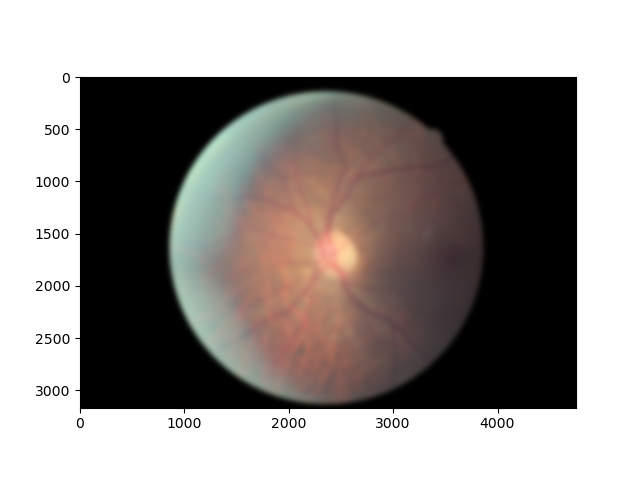

In [49]:
fig, ax = plt.subplots()
plt.imshow(blurred)

Example of looking at pixel intensities from a lateral prespective, for example Y=150. Using image_gray 

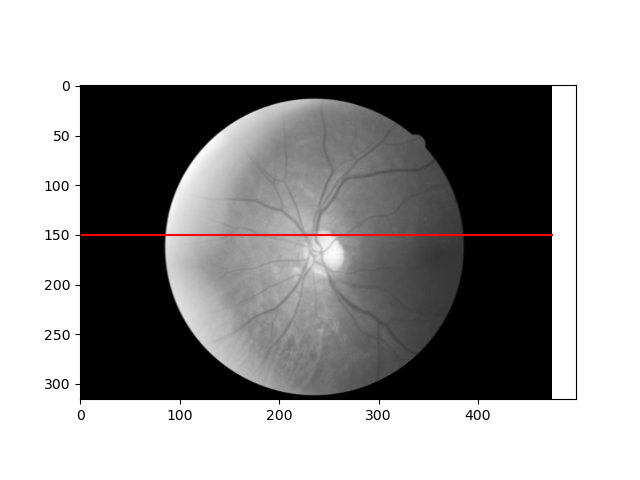

In [51]:
#Create a blurred version of grayscale image 
xmin, xmax = (0, image_gray.shape[1])
Y = ymin = ymax = 150 #define the profile 

fig, ax = plt.subplots()
ax.imshow(image_gray, cmap='gray')
ax.plot([xmin, xmax], [ymin, ymax], color='red')


Text(0.5, 0, 'X')

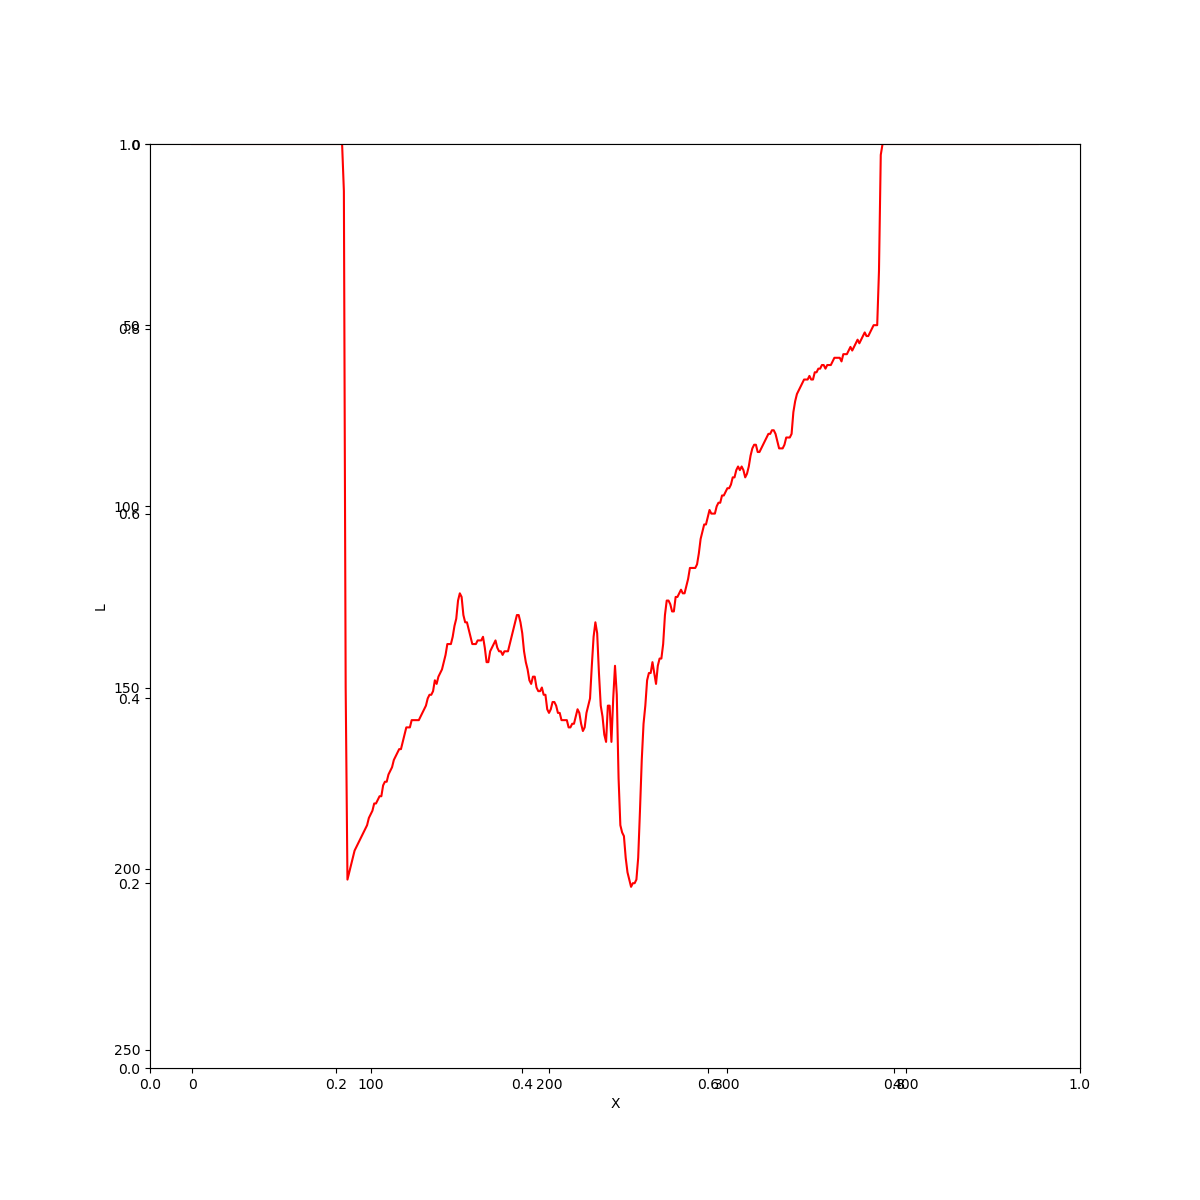

In [57]:
#line plot to see the pixel intensities. 

image_gray_pixels_slice = image_gray[Y,:] #selecting the vector of pixels along 'Y'

image_gray_pixels_slice = ski.img_as_ubyte(image_gray_pixels_slice) #Guarantee that the intensity values are in the [0:255] range (unsigned integers)

fig, ax = plt.subplots(figsize=(12,12))
ax = fig.add_subplot()

ax.plot(image_gray_pixels_slice, color='red')
ax.set_ylim(255, 0)
ax.set_ylabel('L')
ax.set_xlabel('X')